In [5]:
import tensorflow as tf
tf.enable_eager_execution()

In [10]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage import io

orig_phantom = img_as_ubyte(data.coins())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

In [7]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

In [8]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(6)
orig_phantom_tf = tf.expand_dims(tf.expand_dims(orig_phantom, axis=0), axis=-1)
orig_phantom_tf = tf.cast(orig_phantom_tf, tf.int32)
selem_tf = tf.cast(selem, tf.int32)
selem_tf = tf.reshape(selem_tf, (13, 13, 1))

# Grayscale Morphology

## Grayscale Erosion

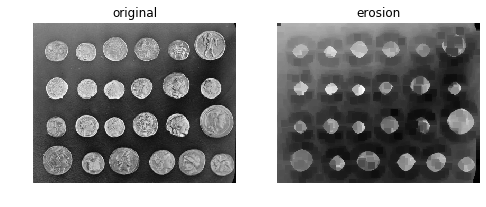

In [48]:
eroded_tf = tf.nn.erosion2d(orig_phantom_tf, selem_tf, 
                            [1, 1, 1, 1], 
                            [1, 1, 1, 1], "SAME")
plot_comparison(np.squeeze(orig_phantom_tf), np.squeeze(eroded_tf), 'erosion')

## Grayscale Dilation

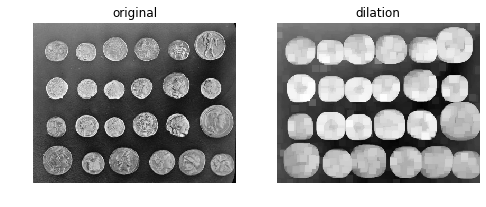

In [17]:
dilated_tf = tf.nn.dilation2d(orig_phantom_tf, selem_tf, 
                            [1, 1, 1, 1], 
                            [1, 1, 1, 1], "SAME")
plot_comparison(np.squeeze(orig_phantom_tf), np.squeeze(dilated_tf), 'dilation')

## Grayscale Closing

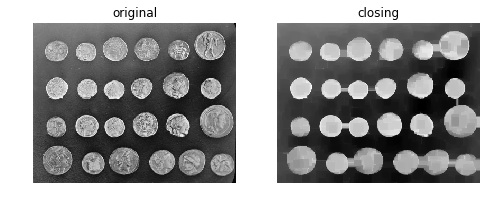

In [19]:
opened = closing2d(orig_phantom_tf, selem_tf)
plot_comparison(np.squeeze(orig_phantom_tf), np.squeeze(opened), 'closing')

## Grayscale Opening

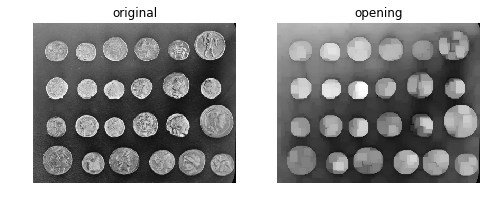

In [20]:
opened = opening2d(orig_phantom_tf, selem_tf)
plot_comparison(np.squeeze(orig_phantom_tf), np.squeeze(opened), 'opening')

# Binary Morphology

In [28]:
horse = data.horse()
horse_mask = horse == 0
horse_mask[45:50, 75:80] = 1
horse_mask = tf.cast(horse_mask, tf.int32)
horse_mask = tf.reshape(horse_mask, (1, 328, 400, 1))

## Binary dilation

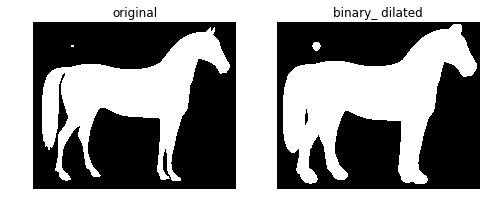

In [32]:
eroded = binary_dilation2d(horse_mask, selem_tf)
plot_comparison(np.squeeze(horse_mask), np.squeeze(eroded), 'binary_ dilated')

## Binary erosion

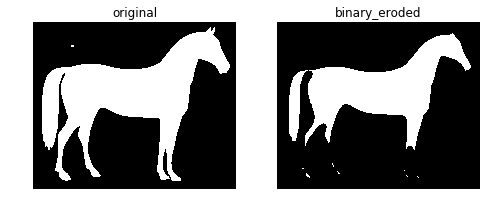

In [33]:
eroded = binary_erosion2d(horse_mask, selem_tf)
plot_comparison(np.squeeze(horse_mask), np.squeeze(eroded), 'binary_eroded')

## Binary closing

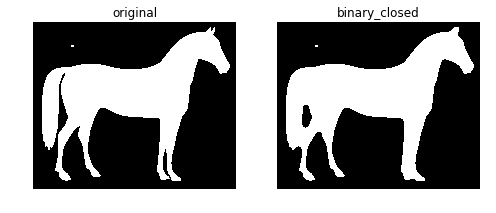

In [36]:
eroded = binary_closing2d(horse_mask, selem_tf)
plot_comparison(np.squeeze(horse_mask), np.squeeze(eroded), 'binary_closed')

## Binary opening

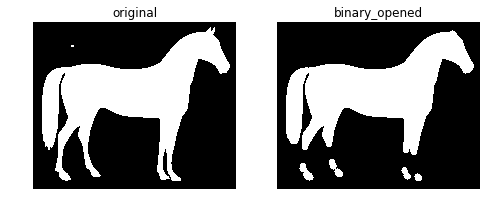

In [38]:
opened = binary_opening2d(horse_mask, selem_tf)
plot_comparison(np.squeeze(horse_mask), np.squeeze(opened), 'binary_opened')